# Dataset 1

# Import Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime, timedelta

# Load the Dataset

In [38]:
# Read the csv file with the dataset and put it into a variable (heart disease data)
hdd = pd.read_csv('heart 2.csv')

# Makes a dataframe of the data
hdd_df = pd.DataFrame(hdd)

# Prints out the dataset and dataframe
print("Original Dataset:")
print(hdd)
print("Dataframe:")
hdd_df

Original Dataset:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Feature Scaling and Encoding

In [41]:
# Define the numerical features
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Scale the numerical features
scaler = StandardScaler()
hdd_df[num_features] = scaler.fit_transform(hdd_df[num_features])

# Prints out the preprocessed data
print("\nScaling Complete! Data:")
hdd_df


Scaling Complete! Data:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,0,1,0.647366,1,-0.912329,2,0,2,1
1021,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,1,1,3,0
1022,-0.819834,1,0,-1.234378,0.562371,0,0,-1.353113,1,-0.060888,1,1,2,0
1023,-0.488996,0,0,-1.234378,0.155137,0,0,0.429923,0,-0.912329,2,0,2,1


# EDA

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
                age          sex           cp      trestbps          chol  \
count  1.025000e+03  1025.000000  1025.000000  1.025000e+03  1.025000e+03   
mean  -3.431402e-16     0.695610     0.942439 -7.036106e-16 -3.466062e-18   
std    1.000488e+00     0.460373     1.029641  1.000488e+00  1.000488e+00   
min   -2.804866e+00     0.000000     0.000000 -2.148237e+00 -2.327054e+00   
25%   -7.095548e-01     0.000000     0.000000 -6.632165e-01 -6.787242e-01   
50%    1.726817e-01     1.000000     1.000000 -9.205458e-02 -1.163527e-01   
75%    7.240794e-01     1.000000     2.000000  4.791073e-01  5.623715e-01   
max    2.488552e+00     1.000000     3.000000  3.906079e+00  6.166694e+00   

               fbs      restecg       thalach        exang       oldpeak  \
coun

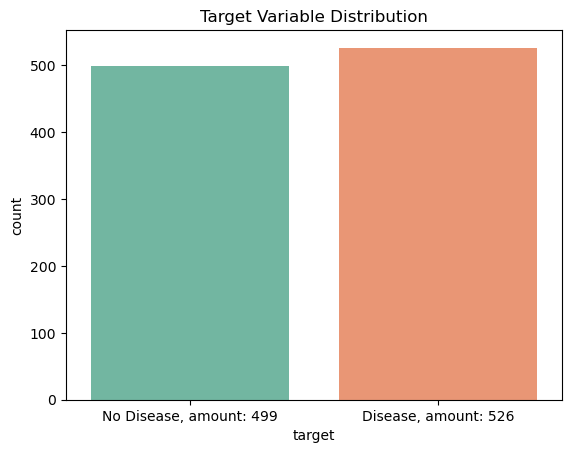

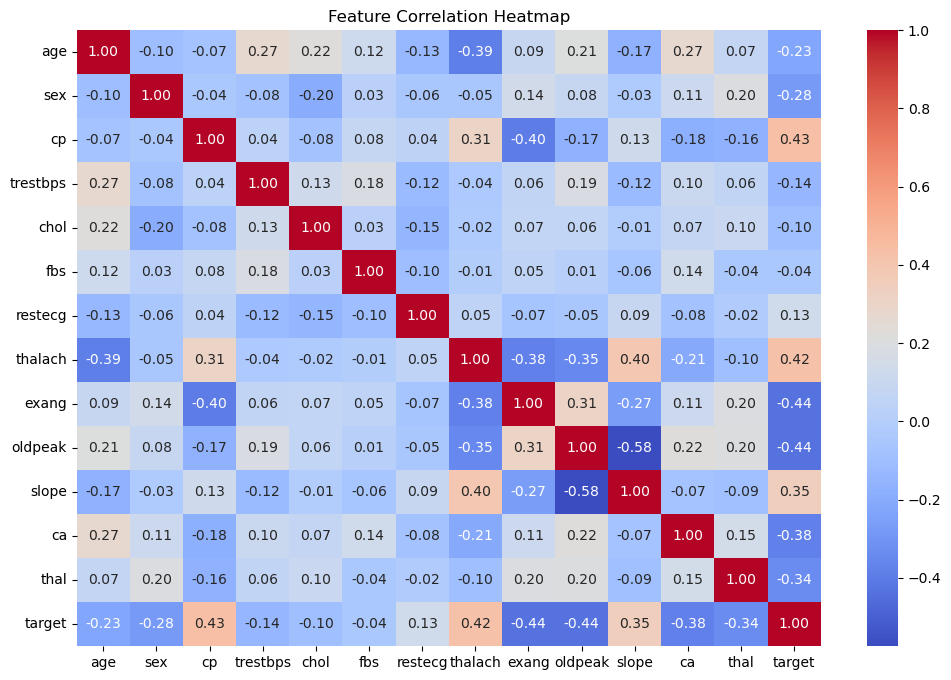

In [44]:
# Checks missing values, for example if a patient didn't provide their age or a sensor failed to record something there will be a value missing
print("Missing Values:\n", hdd.isnull().sum())

# Describes the data
print(hdd_df.describe())

# Vizualizes the distribution of the target variable
count_0 = hdd_df['target'].value_counts().get(0, 0)
count_1 = hdd_df['target'].value_counts().get(1, 0)

sns.countplot(x='target', data=hdd, hue='target', palette='Set2', legend=False)
plt.title("Target Variable Distribution")
plt.xticks(ticks=[0, 1], labels=[f"No Disease, amount: {count_0}", f"Disease, amount: {count_1}"])
plt.show()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hdd_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

As we can see there is a relevant correlation between cp, thalach, slope and target.

# Split the Dataset

In [47]:
X = hdd_df.drop(columns=['target'])
y = hdd_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShapes After Splitting:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

# Saves the preprocessed dataset to a csv file
X_train.to_csv('X_train_hdd.csv', index=False)
X_test.to_csv('X_test_hdd.csv', index=False)
y_train.to_csv('y_train_hdd.csv', index=False)
y_test.to_csv('y_test_hdd.csv', index=False)
print("\nPreprocessing Complete! Files saved.")


Shapes After Splitting:
X_train: (820, 13), X_test: (205, 13), y_train: (820,), y_test: (205,)

Preprocessing Complete! Files saved.


# Train the Model

In [51]:
# Training the model, these parameters yielded the best results
hdd_model = RandomForestClassifier(n_estimators=50, max_depth=9, random_state=42)
hdd_model.fit(X_train, y_train)

# Predictions on training data
y_train_pred = hdd_model.predict(X_train)
# Predictions on testing data
y_test_pred = hdd_model.predict(X_test)

# Evaluate the Model

The goal of this model was to predict whether patients are at risk of heart disease or not and here are some metrics to evaluate the performance.

In [54]:
# Calculate model performance
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_scores = cross_val_score(hdd_model, X_train, y_train, cv=5)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Classfication Report: \n{classification_rep:}")
print(f"Training Confusion Matrix: \n{train_confusion_matrix}")
print(f"Testing Confusion Matrix: \n{test_confusion_matrix}")
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Model Performance:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.12
R-squared: 0.94
Classfication Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Training Confusion Matrix: 
[[397   0]
 [  0 423]]
Testing Confusion Matrix: 
[[102   0]
 [  3 100]]
Training Accuracy: 100.00%
Testing Accuracy: 98.54%
Cross-Validation Accuracy: 0.98 ± 0.02


Based off of these we find that:

Low RMSE - Suggests that the model's errors are relatively small.

R² - Shows the model captures 94% of the patterns in the data, which means that the model is capturing most of the patterns present in the dataset.

High precision for No Disease - When the model predicts no disease, it is almost always correct.

High recall for Disease - The model correctly identifies almost all patients with heart disease.

Balanced F1-scores - This suggests a good balance between precision and recall.

3 false negatives - The model missed only 3 actual heart disease cases, which means the model is cautious, prioritizing detecting heart disease cases over avoiding false alarms.

Training accuracy is higher than test accuracy, means the model might be slightly overfitting, however this difference is quite small.

Cross-validation accuracy - This further confirms the model's robustness, as it consistently performs well across different subsets of the data.

Overall our model performs quite well, detecting almost 10 out of 10 cases of heart disease.

# Test Model - Logistic Regression

We also used a logistic regression model to check if randomforestclassifier was overfitting or not.

In [58]:
hdd_model2 = LogisticRegression()
hdd_model2.fit(X_train, y_train)

y_pred_log = hdd_model2.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7951219512195122


# Dataset 2
As a classification problem.

# Load the Dataset

In [62]:
# Read the csv file with the dataset and put it into a variable
tslad = pd.read_csv('TSLA.csv')

# Makes a DataFrame out of the data
tsla_df = pd.DataFrame(tslad)

# Prints out the dataset and dataframe
print("Original Dataset:")
print(tslad)
print("Dataframe:")
tsla_df

Original Dataset:
            Date         Open         High         Low        Close  \
0     2010-06-29     3.800000     5.000000    3.508000     4.778000   
1     2010-06-30     5.158000     6.084000    4.660000     4.766000   
2     2010-07-01     5.000000     5.184000    4.054000     4.392000   
3     2010-07-02     4.600000     4.620000    3.742000     3.840000   
4     2010-07-06     4.000000     4.000000    3.166000     3.222000   
...          ...          ...          ...         ...          ...   
2951  2022-03-18   874.489990   907.849976  867.390015   905.390015   
2952  2022-03-21   914.979980   942.849976  907.090027   921.159973   
2953  2022-03-22   930.000000   997.859985  921.750000   993.979980   
2954  2022-03-23   979.940002  1040.699951  976.400024   999.109985   
2955  2022-03-24  1009.729980  1024.489990  988.799988  1013.919983   

        Adj Close    Volume  
0        4.778000  93831500  
1        4.766000  85935500  
2        4.392000  41094000  
3        

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


# Feature Scaling and Formatting

Feature scaling is not needed in this case, but we do set the index as the dates and create some features here.

In [65]:
# Convert 'Date' column to datetime
tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])

# Set 'Date' as the index
tsla_df.set_index('Date', inplace=True)

# Creates a new feature called tomorrow that calculates tomorrows price by shifting close by -1
tsla_df['Tomorrow'] = tsla_df['Close'].shift(-1)

# Creates our target variable by checking if 'Tomorrow' price is lower or higher than 'Close' and assigning a 0 or 1 value to it
tsla_df['Target'] = (tsla_df['Tomorrow'] < tsla_df['Close']).astype(int)

# Prints out the preprocessed data
print("Scaling Completed! Data:")
tsla_df

Scaling Completed! Data:


,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,4.766000,1
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,4.392000,1
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,3.840000,1
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,3.222000,1
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,3.160000,1
...,...,...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,921.159973,0
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,993.979980,0
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,999.109985,0


# EDA

Here we are making the graph to visualize the dataset. We found that the data has irregular patterns and that a linear regression model would most likely not work here.

Missing Values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Tomorrow     1
Target       0
dtype: int64


<Axes: xlabel='Date'>

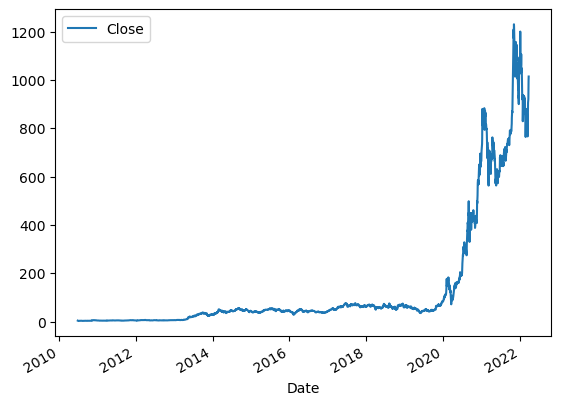

In [68]:
# Checks missing values
print("Missing Values:\n", tsla_df.isnull().sum())

# Plots the close value on a graph
tsla_df.plot.line(y='Close', use_index=True)

# Split the Dataset

We are dropping "Adj Close" because it is not needed to train the model, we also drop "Tomorrow" because it was only needed to get the feature "Target", and we are dropping "Target" because that is our target feature.

In [71]:
X = tsla_df.drop(columns=['Adj Close', 'Tomorrow', 'Target'])
y = tsla_df['Target']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)   # TRY CHANGING

print("\nShapes After Splitting:")
print(f"X_train: {X_train2.shape}, X_test: {X_test2.shape}, y_train: {y_train2.shape}, y_test: {y_test2.shape}")

# Saves the preprocessed dataset to a csv file
X_train2.to_csv('X_train_tsla.csv', index=True)
X_test2.to_csv('X_test_tsla.csv', index=True)
y_train2.to_csv('y_train_tsla.csv', index=True)
y_test2.to_csv('y_test_tsla.csv', index=True)
print("\nPreprocessing Complete! Files saved.")


Shapes After Splitting:
X_train: (2364, 5), X_test: (592, 5), y_train: (2364,), y_test: (592,)

Preprocessing Complete! Files saved.


# Train the Model

In [74]:
# Trains the model, changing parameters didn't improve results much
tsla_model = RandomForestClassifier(n_estimators=100, min_samples_split=20, max_depth=15, random_state=42, class_weight='balanced')
tsla_model.fit(X_train2, y_train2)

# Makes a prediction
y_test_pred2 = tsla_model.predict(X_test2)

# Test the Model

In [77]:
# Generate future dates
start_date = datetime.strptime("2023-01-01", "%Y-%m-%d")
predict_dates = [start_date + timedelta(days=i) for i in range(100)]

# Use the last known row of data as a base for future predictions
last_known_row = X.iloc[-1].copy()
future_features = last_known_row.copy()
predicted_prices = []
current_price = last_known_row['Close']
previous_price = current_price

# Rolling feature updates
for date in predict_dates:
    future_features['Close'] = current_price
    movement = tsla_model.predict(pd.DataFrame([future_features], columns=X.columns))[0]
    price_change = np.random.uniform(-1, 1) * 0.01 * current_price
    current_price += price_change if movement == 1 else -price_change
    predicted_prices.append(current_price)
    
    movement_label = 'Up' if current_price > previous_price else 'Down'
    print(f"Predicted stock price for {date.strftime('%Y-%m-%d')}: ${current_price:.2f} ({movement_label})")
    previous_price = current_price

Predicted stock price for 2023-01-01: $1004.22 (Down)
Predicted stock price for 2023-01-02: $999.62 (Down)
Predicted stock price for 2023-01-03: $990.50 (Down)
Predicted stock price for 2023-01-04: $989.27 (Down)
Predicted stock price for 2023-01-05: $987.56 (Down)
Predicted stock price for 2023-01-06: $979.88 (Down)
Predicted stock price for 2023-01-07: $988.82 (Up)
Predicted stock price for 2023-01-08: $998.46 (Up)
Predicted stock price for 2023-01-09: $1002.66 (Up)
Predicted stock price for 2023-01-10: $1005.95 (Up)
Predicted stock price for 2023-01-11: $1006.79 (Up)
Predicted stock price for 2023-01-12: $1016.14 (Up)
Predicted stock price for 2023-01-13: $1017.36 (Up)
Predicted stock price for 2023-01-14: $1007.29 (Down)
Predicted stock price for 2023-01-15: $1009.96 (Up)
Predicted stock price for 2023-01-16: $1006.15 (Down)
Predicted stock price for 2023-01-17: $1009.09 (Up)
Predicted stock price for 2023-01-18: $1000.36 (Down)
Predicted stock price for 2023-01-19: $1009.88 (Up)
P

# Evaluate the Model

In [80]:
# Calculate model performance
mae2 = mean_absolute_error(y_test2, y_test_pred2)
mse2 = mean_squared_error(y_test2, y_test_pred2)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test2, y_test_pred2)
accuracy2 = accuracy_score(y_test2, y_test_pred2)
precision2 = precision_score(y_test2, y_test_pred2)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae2:.2f}")
print(f"Mean Squared Error (MSE): {mse2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse2:.2f}")
print(f"R-squared: {r22:.2f}")
print(f"Model Accuracy: {accuracy2 * 100:.2f}%")
print(f"Model Precision: {precision2 * 100:.2f}%")


Model Performance:
Mean Absolute Error (MAE): 0.55
Mean Squared Error (MSE): 0.55
Root Mean Squared Error (RMSE): 0.74
R-squared: -1.25
Model Accuracy: 44.59%
Model Precision: 44.25%


The model performance tells us that this model performs terrribly, the R-squared shows us that it doesn't capture any meaninful patterns from the data and the accuracy being bellow 50% means that it is worse than just guessing or flipping a coin 50/50. 

To improve this model we could either try to add more features or maybe get more data. All in all stock prices are difficult to predict and are affected by many factors.

Bellow we try to tackle this as a regression problem to see if the results are any better.

# Dataset 2
As a regression problem.

# Load the Dataset

In [85]:
# Read the csv file with the dataset and put it into a variable
tslad = pd.read_csv('TSLA.csv')

# Makes a DataFrame out of the data
tsla_df = pd.DataFrame(tslad)

# Prints out the dataset and dataframe
print("Original Dataset:")
print(tslad)
print("Dataframe:")
tsla_df

Original Dataset:
            Date         Open         High         Low        Close  \
0     2010-06-29     3.800000     5.000000    3.508000     4.778000   
1     2010-06-30     5.158000     6.084000    4.660000     4.766000   
2     2010-07-01     5.000000     5.184000    4.054000     4.392000   
3     2010-07-02     4.600000     4.620000    3.742000     3.840000   
4     2010-07-06     4.000000     4.000000    3.166000     3.222000   
...          ...          ...          ...         ...          ...   
2951  2022-03-18   874.489990   907.849976  867.390015   905.390015   
2952  2022-03-21   914.979980   942.849976  907.090027   921.159973   
2953  2022-03-22   930.000000   997.859985  921.750000   993.979980   
2954  2022-03-23   979.940002  1040.699951  976.400024   999.109985   
2955  2022-03-24  1009.729980  1024.489990  988.799988  1013.919983   

        Adj Close    Volume  
0        4.778000  93831500  
1        4.766000  85935500  
2        4.392000  41094000  
3        

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


# Feature Scaling and Formatting

In [88]:
# Convert 'Date' column to datetime
tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])

# Set 'Date' as the index
tsla_df.set_index('Date', inplace=True)

# Define the numerical features
num_features2 = ['Open', 'High', 'Low', 'Adj Close', 'Volume']

# Scale the numerical features
scaler = StandardScaler()
tsla_df[num_features2] = scaler.fit_transform(tsla_df[num_features2])

# Prints out the preprocessed data
print("Scaling Completed! Data:")
tsla_df

Scaling Completed! Data:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,-0.539560,-0.534640,-0.541240,4.778000,-0.535764,2.234419
2010-06-30,-0.534128,-0.530403,-0.536513,4.766000,-0.535812,1.952208
2010-07-01,-0.534760,-0.533921,-0.539000,4.392000,-0.537307,0.349529
2010-07-02,-0.536360,-0.536126,-0.540280,3.840000,-0.539514,-0.200703
2010-07-06,-0.538760,-0.538549,-0.542643,3.222000,-0.541986,0.107938
...,...,...,...,...,...,...
2022-03-18,2.943165,2.994600,3.003140,905.390015,3.065521,0.074842
2022-03-21,3.105123,3.131415,3.166023,921.159973,3.128580,-0.142509
2022-03-22,3.165203,3.346449,3.226171,993.979980,3.419766,0.142071


# EDA

Missing Values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<Axes: xlabel='Date'>

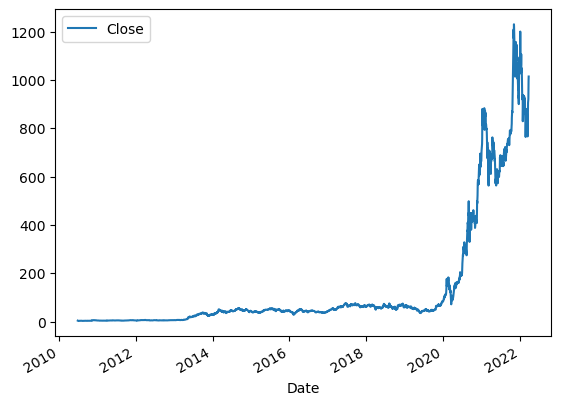

In [91]:
# Checks missing values
print("Missing Values:\n", tsla_df.isnull().sum())

# Plots the close value on a graph
tsla_df.plot.line(y='Close', use_index=True)

# Split the Dataset

In [94]:
X_reg = tsla_df.drop(columns=['Adj Close', 'Close', 'Open'])
y_reg = tsla_df['Close']

X_train2_reg, X_test2_reg, y_train2_reg, y_test2_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42, shuffle=False)

print("\nShapes After Splitting: reg")
print(f"X_train: {X_train2_reg.shape}, X_test: {X_test2_reg.shape}, y_train: {y_train2_reg.shape}, y_test: {y_test2_reg.shape}")

# Saves the preprocessed dataset to a csv file
X_train2_reg.to_csv('X_train_tsla2.csv', index=True)
X_test2_reg.to_csv('X_test_tsla2.csv', index=True)
y_train2_reg.to_csv('y_train_tsla2.csv', index=True)
y_test2_reg.to_csv('y_test_tsla2.csv', index=True)
print("\nPreprocessing Complete! Files saved.")


Shapes After Splitting: reg
X_train: (2364, 3), X_test: (592, 3), y_train: (2364,), y_test: (592,)

Preprocessing Complete! Files saved.


# Train the Model

In [97]:
# Training the model, changing the parameters also doesn't yield much better results here
tsla_model_reg = RandomForestRegressor(n_estimators=500, min_samples_split=5, min_samples_leaf=1, random_state=42)
tsla_model_reg.fit(X_train2_reg, y_train2_reg)

# Makes a prediction
y_test_pred2_reg = tsla_model_reg.predict(X_test2_reg)

# Evaluate the Model

In [99]:
mae_reg = mean_absolute_error(y_test2_reg, y_test_pred2_reg)
mse_reg = mean_squared_error(y_test2_reg, y_test_pred2_reg)
rmse_reg = np.sqrt(mean_squared_error(y_test2_reg, y_test_pred2_reg))
r2_reg = r2_score(y_test2_reg, y_test_pred2_reg)

print("\nModel Evaluation Reg")
print(f"MAE model : {mae_reg:.2f}")
print(f"MSE model : {mse_reg:.2f}")
print(f"RMSE model : {rmse_reg:.2f}")
print(f"R2 model : {r2_reg:.2f}")


Model Evaluation Reg
MAE model : 472.33
MSE model : 323176.96
RMSE model : 568.49
R2 model : -2.22


The regression model also doesn't perform well, if anything these results showed it performed worse, thought this is understandable since we only use dates as a predictor.

To use all the features I would need to train multiple models to predict a value for all the different features and then use those along with the future dates, I could also use a more complex neural network to predict everything all together but that is a bit beyond the scope of this exercise I'd say. Therefore, I'm sticking with only using 'Date_Ordinal', which produces a model that performs very badly.

# Dataset 3

# Load the Dataset

In [103]:
# Read the csv file with the dataset and put it into a variable (data)
msdrd = pd.read_excel('msd_risk_dataset.xlsx')

# Makes a dataframe of the data
msdr_df = pd.DataFrame(msdrd)

# Prints out the dataset and dataframe
print("Original Dataset:")
print(msdrd)
print("Dataframe:")
msdr_df

Original Dataset:
     msd_risk  Cervical Deviation  Thoracic Deviation  Lumbar Deviation  \
0         Low            6.664560           17.385710          4.127822   
1        High            1.868204            3.316403          4.127822   
2        High           11.761539            7.410447         16.869219   
3      Medium            1.868204            3.316403         16.869219   
4         Low            6.664560            3.316403          7.034855   
...       ...                 ...                 ...               ...   
9995     High            1.868204            3.316403          4.127822   
9996     High            1.868204           17.385710          4.127822   
9997     High            6.664560            3.316403          4.127822   
9998      Low            1.868204            7.410447          4.127822   
9999      Low            1.868204            7.410447          7.034855   

      Pelvic Tilt Deviation  Craniovertebral Angle  Shoulder Level Deviation  \
0

,msd_risk,Cervical Deviation,Thoracic Deviation,Lumbar Deviation,Pelvic Tilt Deviation,Craniovertebral Angle,Shoulder Level Deviation,Backpack Height,Backpack Weight,Child’s Age,Child’s Weight,Child’s Height,Gender
0,Low,6.664560,17.385710,4.127822,9.536482,8.138638,1.988979,Slightly Lower,4.362735,14,58.700489,142.991991,Male
1,High,1.868204,3.316403,4.127822,15.531397,3.390192,1.988979,On Buttocks,15.869656,14,58.700489,165.689616,Female
2,High,11.761539,7.410447,16.869219,1.544396,8.138638,1.988979,Slightly Lower,4.362735,9,44.264021,165.689616,Female
3,Medium,1.868204,3.316403,16.869219,1.544396,8.138638,1.988979,Shoulder Blades to Lower Back,4.362735,9,44.264021,165.689616,Male
4,Low,6.664560,3.316403,7.034855,1.544396,3.390192,1.988979,Shoulder Blades to Lower Back,12.230187,12,44.264021,142.991991,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,High,1.868204,3.316403,4.127822,9.536482,8.138638,1.988979,Slightly Lower,4.362735,12,58.700489,142.991991,Male
9996,High,1.868204,17.385710,4.127822,1.544396,3.390192,8.594159,On Buttocks,4.362735,14,30.486436,123.244437,Male
9997,High,6.664560,3.316403,4.127822,1.544396,3.390192,1.988979,On Buttocks,4.362735,9,58.700489,142.991991,Female
9998,Low,1.868204,7.410447,4.127822,15.531397,8.138638,1.988979,On Buttocks,4.362735,12,30.486436,142.991991,Female


# Feature Scaling and Encoding

In [105]:
# Define the numerical features
num_features3 = ['Cervical Deviation', 'Thoracic Deviation', 'Lumbar Deviation', 'Pelvic Tilt Deviation', 'Craniovertebral Angle', 'Shoulder Level Deviation',
                 'Backpack Weight', 'Child’s Age', 'Child’s Weight', 'Child’s Height']

# Scale the numerical features
scaler = StandardScaler()
msdr_df[num_features3] = scaler.fit_transform(msdr_df[num_features3])

# Encode categorical features using LabelEncoder
le = LabelEncoder()
msdr_df['Backpack Height'] = le.fit_transform(msdr_df['Backpack Height'])
msdr_df['msd_risk'] = le.fit_transform(msdr_df['msd_risk'])

# One-Hot Encode the 'Gender' column
encoder = OneHotEncoder(sparse_output=False)
gender_encoded = encoder.fit_transform(msdr_df[['Gender']])  # Pass as a DataFrame (2D)

# Convert the encoded 'Gender' column back to a DataFrame
gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['Gender']))

# Drop only the 'Gender' column (keep 'Backpack Height' and 'msd_risk')
msdr_df = msdr_df.drop(columns=['Gender']).reset_index(drop=True)

# Add the one-hot-encoded 'Gender' columns to the DataFrame
msdr_df = pd.concat([msdr_df, gender_encoded_df], axis=1)

# Prints out the preprocessed data
print("\nScaling Complete! Data:")
print(msdr_df)


Scaling Complete! Data:
      msd_risk  Cervical Deviation  Thoracic Deviation  Lumbar Deviation  \
0            1            0.345181            1.905169         -0.707270   
1            0           -0.898904           -0.760418         -0.707270   
2            0            1.667242            0.015244          1.937652   
3            2           -0.898904           -0.760418          1.937652   
4            1            0.345181           -0.760418         -0.103814   
...        ...                 ...                 ...               ...   
9995         0           -0.898904           -0.760418         -0.707270   
9996         0           -0.898904            1.905169         -0.707270   
9997         0            0.345181           -0.760418         -0.707270   
9998         1           -0.898904            0.015244         -0.707270   
9999         1           -0.898904            0.015244         -0.103814   

      Pelvic Tilt Deviation  Craniovertebral Angle  Shoulder L

# EDA
Warning! Feature importance must be run after the model is loaded!

Missing Values:
 msd_risk                    0
Cervical Deviation          0
Thoracic Deviation          0
Lumbar Deviation            0
Pelvic Tilt Deviation       0
Craniovertebral Angle       0
Shoulder Level Deviation    0
Backpack Height             0
Backpack Weight             0
Child’s Age                 0
Child’s Weight              0
Child’s Height              0
Gender                      0
dtype: int64
       Cervical Deviation  Thoracic Deviation  Lumbar Deviation  \
count        10000.000000        10000.000000      10000.000000   
mean             5.333774            7.329988          7.534957   
std              3.855522            5.278391          4.817546   
min              1.868204            3.316403          4.127822   
25%              1.868204            3.316403          4.127822   
50%              6.664560            7.410447          4.127822   
75%              6.664560            7.410447          7.034855   
max             11.761539           17.38571

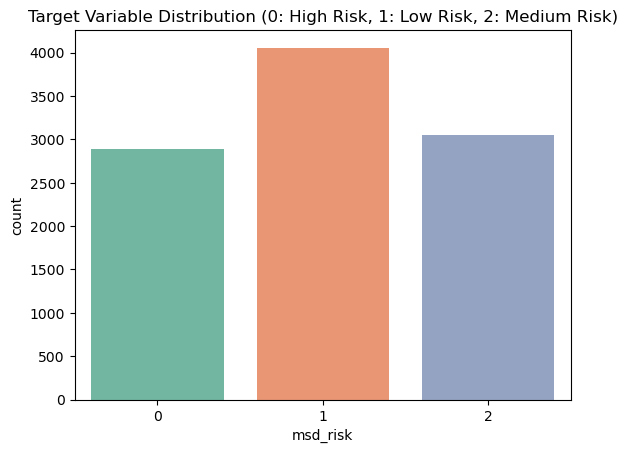

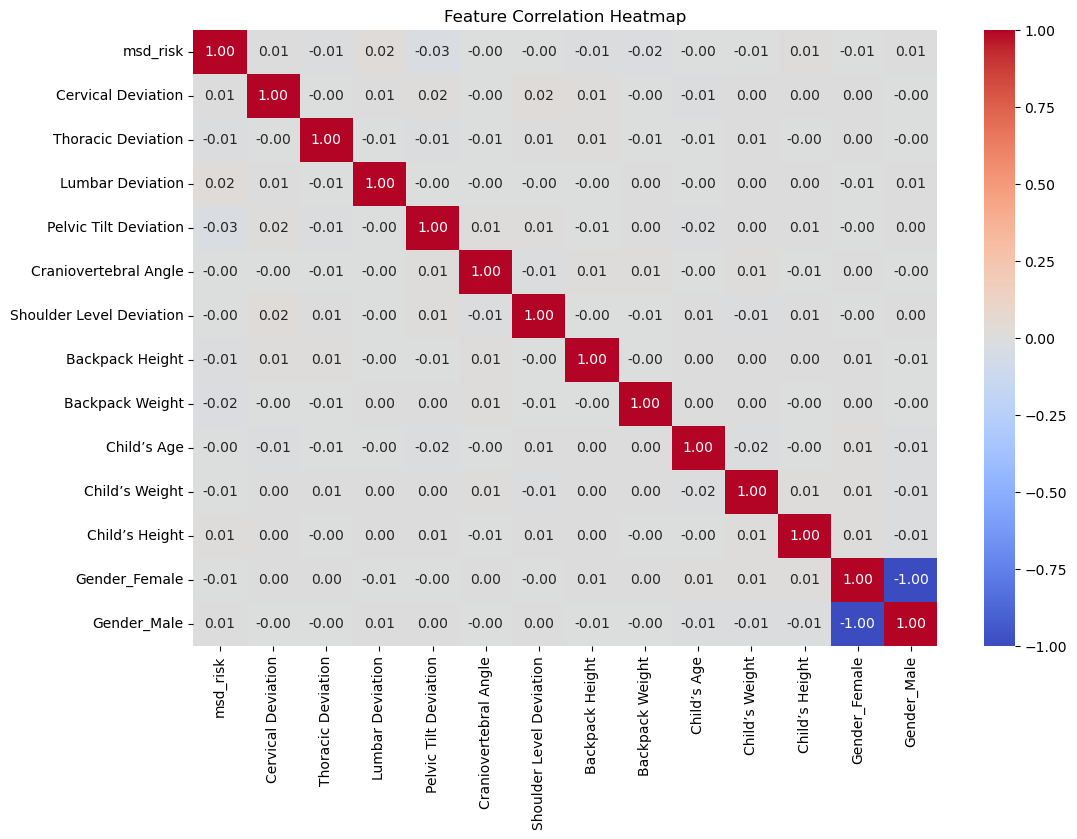

NameError: name 'msdr_model' is not defined

In [107]:
# Checks missing values
print("Missing Values:\n", msdrd.isnull().sum())

# Describes the data
print(msdrd.describe())

# Vizualizes the distribution of the target variable
sns.countplot(x='msd_risk', data=msdr_df, hue='msd_risk', palette='Set2', legend=False)
plt.title('Target Variable Distribution (0: High Risk, 1: Low Risk, 2: Medium Risk)')
plt.show()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(msdr_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature Importance graph
feature_importances = msdr_model.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

Our heatmap shows that there is little correlation between the different features of this dataset which is an indicator that this might be a bad dataset to predict who is at risk of MSD.

Gender was also shown to be of low importance in our model so it was removed, in order to see it the model must be ran with gender first then the feature importance graph will display it. (It was around 0.02)

# Split the Dataset

In [ ]:
X = msdr_df.drop(columns=['msd_risk'])
X = msdr_df.drop(columns=['msd_risk', 'Gender_Male', 'Gender_Female'])
y = msdr_df['msd_risk']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShapes After Splitting:")
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

# Saves the preprocessed dataset to a csv file
X_train3.to_csv('X_train_msdr.csv', index=False)
X_test3.to_csv('X_test_msdr.csv', index=False)
y_train3.to_csv('y_train_msdr.csv', index=False)
y_test3.to_csv('y_test_msdr.csv', index=False)
print("\nPreprocessing Complete! Files saved.")

# Train the Model

In [ ]:
# Training our model, tweaking parameters didn't improve the results
msdr_model = RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_split=5,  min_samples_leaf=2, random_state=42)
msdr_model.fit(X_train3, y_train3)

# Predictions on training data
y_train_pred3 = msdr_model.predict(X_train3)
# Predictions on testing data
y_test_pred3 = msdr_model.predict(X_test3)

# Evaluate the Model

In [ ]:
# Calculate model performance
mae3 = mean_absolute_error(y_test3, y_test_pred3)
mse3 = mean_squared_error(y_test3, y_test_pred3)
rmse3 = np.sqrt(mse3)
r23 = r2_score(y_test3, y_test_pred3)
classification_rep3 = classification_report(y_test3, y_test_pred3)
train_confusion_matrix3 = confusion_matrix(y_train3, y_train_pred3)
test_confusion_matrix3 = confusion_matrix(y_test3, y_test_pred3)
train_accuracy3 = accuracy_score(y_train3, y_train_pred3)
test_accuracy3 = accuracy_score(y_test3, y_test_pred3)
cv_scores3 = cross_val_score(msdr_model, X_train3, y_train3, cv=5)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae3:.2f}")
print(f"Mean Squared Error (MSE): {mse3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse3:.2f}")
print(f"R-squared: {r23:.2f}")
print(f"Classfication Report: \n{classification_rep3:}")
print(f"Training Confusion Matrix: \n{train_confusion_matrix3}")
print(f"Testing Confusion Matrix: \n{test_confusion_matrix3}")
print(f"Training Accuracy: {train_accuracy3 * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy3 * 100:.2f}%")
print(f"Cross-Validation Accuracy: {cv_scores3.mean():.2f} ± {cv_scores3.std():.2f}")

We could not achieve any result that was better than 40% with this dataset, both models perform quite badly. Our EDA also indicates that this is straight up a bad dataset to predict what we want.

# Test Model - Logistic Regression

In [ ]:
msdr_model2 = LogisticRegression()
msdr_model2.fit(X_train3, y_train3)

y_train_pred3_log = msdr_model2.predict(X_train3)
y_test_pred3_log = msdr_model2.predict(X_test3)

print("Logistic Regression Train Accuracy:", accuracy_score(y_train3, y_train_pred3_log))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test3, y_test_pred3_log))